# Importing Modules and Creating Dataframe

In [3]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(os.path.join('https://raw.githubusercontent.com/nicknochnack/CommentToxicity/main/jigsaw-toxic-comment-classification-challenge/train.csv/train.csv'))

In [5]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


# Performing Exploratory Data Analysis (EDA)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [8]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Checking number of entries in the dataset
df.size

1276568

In [10]:
print('%d features and %d records.' % (df.shape[1], df.shape[0]))
print()
targets = list(df.columns[2:])
print('Target columns: ' + ', '.join(targets))

8 features and 159571 records.

Target columns: toxic, severe_toxic, obscene, threat, insult, identity_hate


In [11]:
# Number of toxic and non-toxic comments
df.groupby('toxic',sort = False).size()

toxic
0    144277
1     15294
dtype: int64

In [12]:
# Number of severe_toxic and non-severetoxic comments
df.groupby('severe_toxic',sort = False).size()

severe_toxic
0    157976
1      1595
dtype: int64

In [13]:
# Number of obscene and non-obscene comments
df.groupby('obscene',sort = False).size()

obscene
0    151122
1      8449
dtype: int64

In [14]:
# Number of threat and non-threat comments
df.groupby('threat',sort = False).size()

threat
0    159093
1       478
dtype: int64

In [15]:
# Number of insult and non-insult comments
df.groupby('insult',sort = False).size()

insult
0    151694
1      7877
dtype: int64

In [16]:
# Number of identity_hate and non-identity_hate comments
df.groupby('identity_hate',sort = False).size()

identity_hate
0    158166
1      1405
dtype: int64

# Visualisation

<Axes: >

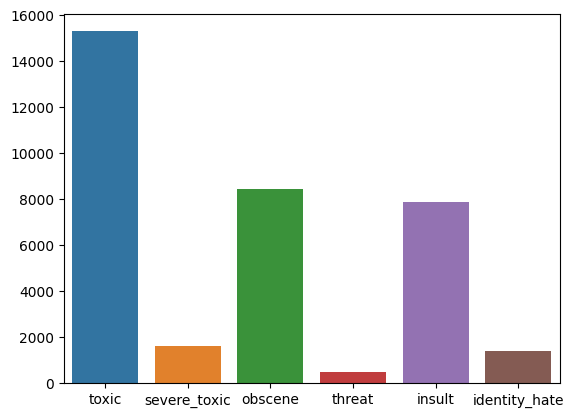

In [17]:
targets = list(df.columns[2:])
df_targets = df[targets].copy()

count_dic = {}
for comment_type in targets:
    counts = list()
    others = list(targets)
    df_selection = df_targets[(df_targets[comment_type]==1)]
    others.remove(comment_type)
    counts.append(('total', len(df_selection)))
    for other in others:
        counts.append((other, df_selection[other].sum()))
    count_dic[comment_type] = counts

totals = []
for key, value in count_dic.items():
    totals.append(value[0][1])

sns.barplot(x=list(count_dic.keys()), y=totals)

'Toxic' represents over 90% of each other category.
Though all appear at first glance to be subcategories of toxic, only 'severe_toxic' is 'toxic' 100% of the time.
Toxic isn't actually an overall category, some attribute of toxic ends up describing most insults, threats, hate comments, and obscenities.

# Preprocess

In [18]:
from keras.layers import TextVectorization

In [19]:

x = df['comment_text']             # Storing all the comments in x variable
y = df[df.columns[2:]].values      # Storing all the values of the categories as 2D array

In [20]:
x

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [21]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [22]:
MAX_FEATURES = 100000 # number of words in the vocab

In [23]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES, output_sequence_length=400, output_mode='int')

In [24]:
vectorizer.adapt(x.values)          # Training vectorizer for our dataset

In [25]:
vectorizer("Hello Multiverse")

<tf.Tensor: shape=(400,), dtype=int64, numpy=
array([  288, 48363,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,   

In [26]:
vectorized_text = vectorizer(x.values)

In [27]:
vectorized_text

<tf.Tensor: shape=(159571, 400), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

In [28]:
# Tensorflow datapipeline
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [29]:
# Training the model for 70% of the batches(data)
train = dataset.take(int(len(dataset)*.7))
# Taking 20% of data for validation purpose after skipping first 70% data
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
# Taking 10% data for testing after skipping first 90% data
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [30]:
len(train)

6981

# Creating model

In [31]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [32]:
# Create the embedding layer 
model = Sequential()
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(6, activation='sigmoid'))

In [33]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          3200032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [35]:
history = model.fit(train, epochs=5, validation_data=val, shuffle='True')

Epoch 1/5
6981/6981 [==============================] - 1091s 156ms/step - loss: 0.0635 - val_loss: 0.0491
Epoch 2/5
6981/6981 [==============================] - 996s 143ms/step - loss: 0.0467 - val_loss: 0.0431
Epoch 3/5
6981/6981 [==============================] - 987s 141ms/step - loss: 0.0419 - val_loss: 0.0384
Epoch 4/5
6981/6981 [==============================] - 987s 141ms/step - loss: 0.0379 - val_loss: 0.0359
Epoch 5/5
6981/6981 [==============================] - 929s 133ms/step - loss: 0.0342 - val_loss: 0.0298


<Figure size 800x500 with 0 Axes>

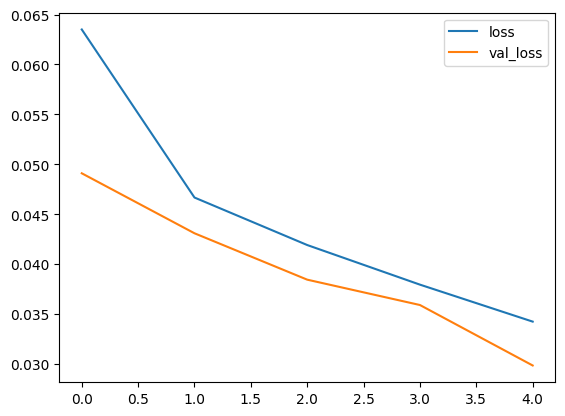

In [36]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

# Predictions

In [37]:
input_text = vectorizer('You freaking suck! I am going to hit you.')

In [38]:
model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 1s 1s/step


array([[0.9987598 , 0.08787489, 0.9721291 , 0.00550637, 0.8738156 ,
        0.05964385]], dtype=float32)

In [39]:
res = model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 0s 31ms/step


In [40]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [41]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 37ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [42]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [43]:
res.shape

(1, 6)

# Evaluate Model

In [44]:
from keras.metrics import Precision, Recall, CategoricalAccuracy

In [60]:
pre = Precision()
re = Recall()

In [46]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)

1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 35ms/step


In [48]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}')

Precision: 0.8465592265129089, Recall:0.8243284225463867


# Test and Gradio

In [49]:
!pip install gradio jinja2

In [50]:
!pip install pyyaml h5py

In [51]:
import gradio as gr

In [52]:
model.save('SafeText.h5')

In [53]:
model = tf.keras.models.load_model('SafeText.h5')

In [54]:
input_str = vectorizer('hey i freaken hate you!')

In [55]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 1s 517ms/step


In [56]:
res

array([[0.8986699 , 0.00917846, 0.09835172, 0.04787875, 0.3899576 ,
        0.1577743 ]], dtype=float32)

In [57]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [58]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

D:\Softwares\Coding\Python 3.10\lib\site-packages\gradio\inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
D:\Softwares\Coding\Python 3.10\lib\site-packages\gradio\inputs.py:30: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
D:\Softwares\Coding\Python 3.10\lib\site-packages\gradio\inputs.py:30: UserWarning: `numeric` parameter is deprecated, and it has no effect
  super().__init__(


In [59]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app. 

Also please ensure that your antivirus or firewall is not blocking the binary file located at: D:\Softwares\Coding\Python 3.10\lib\site-packages\gradio\frpc_windows_amd64_v0.2


1/1 [==============================] - 0s 34ms/step
